# 3部 Pythonによるデータ分析

### 1章 1変量データ編

##### 統計処理とscipy

道具を揃える

In [137]:
import numpy as np #データ操作 
import scipy as sp #データ分析
#有効桁数　小数点以下3桁
%precision 3

'%.3f'

##### 1変量データの管理

1変量データ=1種類しかないデータ

1変量データは普通numpy.arrayで管理

In [138]:
fish_data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

##### 合計とサンプルサイズ

合計値

$\displaystyle \sum_{i=1}^{N}x_{i}$

In [139]:
sp.sum(fish_data)

40

##### 要素数

$N$

In [140]:
len(fish_data)

10

##### 平均値

$\displaystyle \mu = \frac{1}{N}\sum_{i=1}^{N}x_{i}$

In [141]:
mu = sp.mean(fish_data)
mu

4.0

##### 標本分散　データが平均値からどれぐらい離れているのか

$\displaystyle \sigma^2 = \frac{1}{N}\sum_{i=1}^{N}(x_{i}-\mu)^2$

In [143]:
sp.var(fish_data, ddof=0)

1.2

##### 不偏分散　標本平均によるバイアスを考慮した分散

$\displaystyle \sigma^2 = \frac{1}{N-1}\sum_{i=1}^{N-1}(x_{i}-\mu)^2$

In [144]:
sp.var(fish_data, ddof=1)

1.3333333333333333

##### 標準偏差　分散の値が2乗だと使いづらいから平方根取る

$\displaystyle \sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{N}\sum_{i=1}^{N-1}(x_{i}-\mu)^2}$

In [145]:
sigma = sp.std(fish_data, ddof=1)
sigma

1.1547005383792515

##### 標準化　データの平均を0に、標準偏差を1にする操作
$\displaystyle Standard = \frac{(X-\mu)}{\sigma}$

In [23]:
standard = (fish_data - mu)/sigma
standard

array([-1.732, -0.866, -0.866,  0.   ,  0.   ,  0.   ,  0.   ,  0.866,
        0.866,  1.732])

In [146]:
sp.mean(standard)

2.2204460492503132e-17

In [26]:
sp.std(standard, ddof=1)

1.0

##### その他の統計量
最大値 $\max X$

最小値 $\min X$

中央値 $Q_{1/2}(X)$ 外れ値に頑健！

In [27]:
sp.amax(fish_data)

6

In [28]:
sp.amin(fish_data)

2

In [29]:
sp.median(fish_data)

4.0

##### scipy.statsと四分位点
stats　scipyの更に統計学に特化した関数

四分位点　データを昇順に並べた時に、上から75%と25%の位置に来る値

In [30]:
from scipy import stats

In [35]:
fish_data_3 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
stats.scoreatpercentile(fish_data_3, 25)

3.0

In [36]:
stats.scoreatpercentile(fish_data_3, 75)

7.0

### 2章 多変量データ編

##### 整然データ　分析しやすく整列させた表形式のデータ
データの管理方法はこれを目指す

---

以下の4つの特徴を持つ。意味と構造が対応する。
- 個々の値が1つのセルをなす
- 個々の変数が1つの列をなす
- 個々の観測が1つの行をなす
- 個々の観測ユニットの類型が1つの表をなす

##### 雑然データ　整然データではないデータ全て

特に目的のない雑然データを許すな

---

データの整形は本当に大変。自分が大変な思いをしたくなかったら我が振り直せ。

##### クロス集計表（分割表）　行に変数としての意味を持たせた雑然データ
人間の見やすさを目的としている

##### 多変量データの管理　pandasを使おう

道具を揃える

In [41]:
import pandas as pd
import scipy as sp
#有効桁数　小数点以下3桁
%precision 3

'%.3f'

データ読み込み

In [147]:
fish_multi = pd.read_csv("3-2-1-fish_multi.csv")
print(fish_multi)

  species  length
0       A       2
1       A       3
2       A       4
3       B       6
4       B       8
5       B      10


##### グループ別の統計量
- groupbyを使おう

In [148]:
group = fish_multi.groupby("species")
print(group.mean())

         length
species        
A             3
B             8


In [46]:
print(group.std(ddof=1))

         length
species        
A           1.0
B           2.0


★分析もりもりセット

In [45]:
group.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

##### クロス集計表の実装

データの読み込み

In [47]:
shoes = pd.read_csv("3-2-2-shoes.csv")
print(shoes)

   store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9


In [48]:
cross = pd.pivot_table(
    data = shoes,
    values = "sales",
    aggfunc = "sum",
    index = "store",
    columns = "color"
)
print(cross)

color  blue  red
store           
osaka    13    9
tokyo    10   15


##### 共分散　2つの連続型の変数の関係性を見る
- 共分散が0よりも大　片方の変数につられて大きくなる
- 共分散が0よりも小　片方の変数に反発して小さくなる
- 共分散が0ちょうど　変数同士に関係性が見られない

$\displaystyle Cov(x,y)=\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\mu_{x})(y_{i}-\mu_{y})$

より正しくは

$\displaystyle Cov(x,y)=\frac{1}{N-1}\sum_{i=1}^{N}(x_{i}-\mu_{x})(y_{i}-\mu_{y})$

##### 分散共分散行列　複数の変数において、分散と共分散の一覧をまとめた行列
$$
  Cov(x,y) = \left[
    \begin{array}{rr}
      \sigma_{x}^{2} & Cov(x,y) \\
      Cov(x,y) & \sigma_{y}^{2}
    \end{array}
  \right]
$$

# 行列にわざわざする理由は？
- 各列各行に対応する共分散を格納するメリットがある 3章seaborn、ペアプロット。

##### 共分散の実装

データの読み込み

In [50]:
cov_data = pd.read_csv("3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


前準備

In [51]:
x = cov_data["x"]
y = cov_data["y"]
N = len(cov_data)
mu_x = sp.mean(x)
mu_y = sp.mean(y)

計算

In [52]:
cov_sample = sum((x-mu_x)*(y-mu_y))/N
cov_sample

6.906

In [54]:
cov = sum((x-mu_x)*(y-mu_y))/(N-1)
cov

7.673

##### 共分散行列の実装

In [55]:
sp.cov(x, y, ddof = 0)

array([[ 3.282,  6.906],
       [ 6.906, 25.21 ]])

In [56]:
sp.cov(x, y, ddof = 1)

array([[ 3.646,  7.673],
       [ 7.673, 28.011]])

##### ピアソンの積率相関係数　共分散を最大値1、最小値-1に標準化したもの
単に相関係数と言えば大概はこれ。共分散の値は下限と上限が変動しやすいので正規化。

$\displaystyle \rho_{xy}=\frac{Cov(x,y)}{\sqrt{\sigma_{x}^{2}\sigma_{y}^{2}}}$

##### 相関行列　複数の変数において、相関係数の一覧をまとめた行列
$$
  Cov(x,y) = \left[
    \begin{array}{rr}
      1 & \rho_{xy} \\
      \rho_{xy} & 1
    \end{array}
  \right]
$$

##### ピアソンの積率相関係数の実装
$\displaystyle\frac{\frac{1}{N}}{\frac{1}{N}}$の形になるので<br>分散・共分散の計算式の分母に$N$を使うか$N-1$を使うかで相関係数の値に変化はない。

In [57]:
sigma_2_x = sp.var(x, ddof=1)
sigma_2_y = sp.var(y, ddof=1)
rho = cov/sp.sqrt(sigma_2_x*sigma_2_y)
rho

0.7592719041137088

In [58]:
sp.corrcoef(x,y)

array([[1.   , 0.759],
       [0.759, 1.   ]])

##### 相関係数が役に立たない時
相関係数が役に立たない時もある。その時は実際にグラフを描いて確認する必要あり。

### 3章 matplotlib・seabornによるデータの可視化

###### Pythonによるデータの可視化
- matplotlib グラフを描く標準的なライブラリ
- seaborn matplotlibのグラフをより美しく

##### 可視化のための準備

In [61]:
import numpy as npn
import pandas as pd
#表示行数の指定
%precision 3
#グラフを描画するライブラリ
from matplotlib import pyplot as plt
#グラフをJupyter Notebook内に表示させるための指定
%matplotlib inline

##### pyplotによる折れ線グラフ

In [62]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 3, 4, 3, 5, 4, 6, 7, 4, 8])

Text(0,0.5,'y')

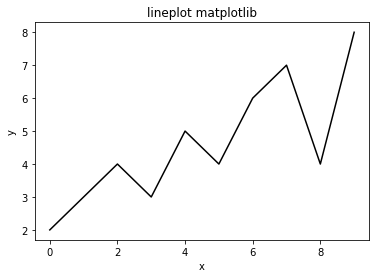

In [63]:
plt.plot(x, y, color='black')
plt.title("lineplot matplotlib")
plt.xlabel("x")
plt.ylabel("y")

##### seaborn+pyplotによる折れ線グラフ

In [66]:
import seaborn as sns
sns.set()#グラフのデザイン変更

Text(0,0.5,'y')

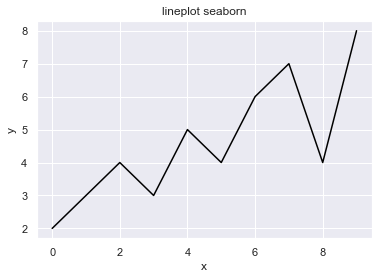

In [67]:
plt.plot(x, y, color = 'black')
plt.title("lineplot seaborn")
plt.xlabel("x")
plt.ylabel("y")

##### seabornによるヒストグラム
seabornの関数を使ったとしてもplt.titleなどの関数は使える。だいたい。

In [68]:
fish_data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

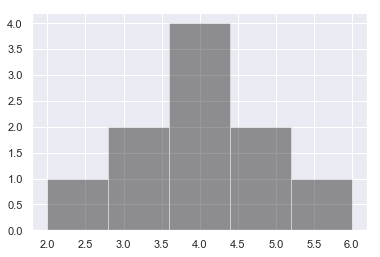

In [70]:
sns.distplot(fish_data, bins = 5,
            color = 'black', kde = False)
# kde = False カーネル密度推定をしない

##### カーネル密度推定によるヒストグラム平滑化
- ヒストグラムの「区分をどのように設定するか問題」を解決するために生まれた
- 区分を分けるのではなくヒストグラムを滑らかな線で繋ごう！

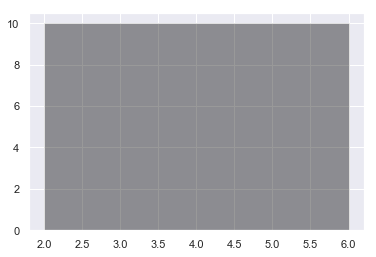

In [72]:
# 区分の設定の失敗例
sns.distplot(fish_data, bins = 1,
            color = 'black', kde = False)

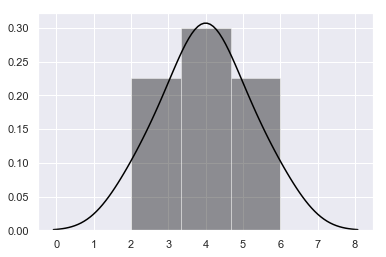

In [74]:
# binの設定もついでになくして
# ヒストグラムの面積の合計が1になるように縦軸が変更される
# 確率的な解釈の手助け　norm_hist=Trueで明示的に
sns.distplot(fish_data, color = 'black')

##### 2変量データに対するヒストグラム

In [76]:
fish_multi = pd.read_csv("3-3-2-fish_multi_2.csv")
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [85]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [152]:
length_a = fish_multi.query('species == "A"' )["length"]
length_b = fish_multi.query('species == "B"')["length"]

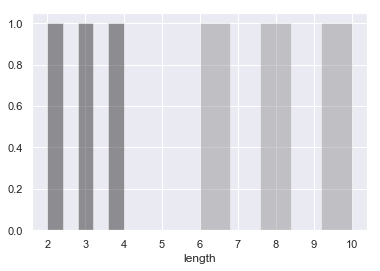

In [155]:
sns.distplot(length_a, bins = 5, kde = False, color = 'black')
sns.distplot(length_b, bins = 5, kde = False, color = 'gray')

##### 多変量データを図示するコードの書き方

##### 箱ひげ図　ボックスプロット
- 箱の中心は中央値
- 上下のひげはmaxmin、箱の上下が四分位点

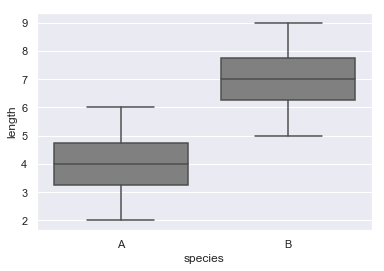

In [99]:
sns.boxplot(x = "species", y = "length",
           data = fish_multi, color = 'gray')

##### バイオリンプロット
- 箱ひげ図の箱の代わりにカーネル密度推定の結果を用いたもの
- ヒストグラムを横向きにしたものを配置した箱ひげ図

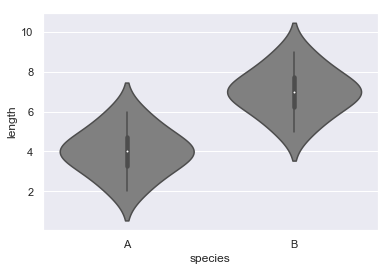

In [101]:
sns.violinplot(x = "species", y = "length",
              data = fish_multi, color = 'gray')

##### 棒グラフ
- 棒の高さは平均値、黒い線はエラーバー
- エラーバーは信頼区間を表す。詳しくは7章。

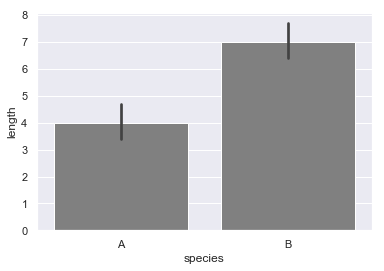

In [103]:
sns.barplot(x = "species", y = "length",
            data = fish_multi, color = 'gray')

##### 散布図
- 数値型の変数*数値型の変数の組み合わせのグラフ

In [105]:
cov_data = pd.read_csv("3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


In [157]:
sns.__version__

'0.9.0'

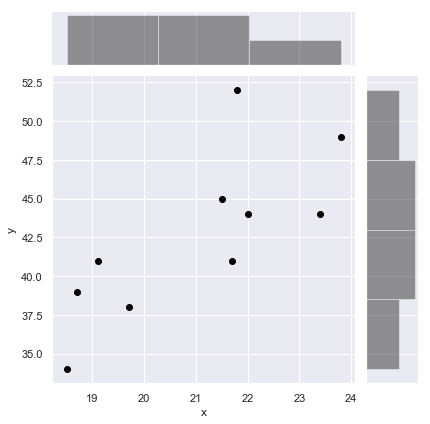

In [158]:
sns.jointplot(x = "x", y = "y",
              data = cov_data, color = 'black')
# pearsonr = ピアソンの積率相関係数
# p = 統計的仮説検定の結果　8章
# versionの違い？　なぜか出ない検定量　オプションで探して見ます🔴

##### ペアプロット
- 多くの変数を持つデータに対する図示の仕方

In [108]:
iris = sns.load_dataset("iris")
iris.head(n = 3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [109]:
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


# 分散共分散行列の役目🔴
- グラフを描写するまでもなく特性を概ね見ることができるので便利。
- 主成分分析において、分散共分散行列により固有値を求めることで寄与率を見ることができる。だから便利。
- 変数間相関行列　逆行列だったり、線形代数の数々の法則を支えたり、PCのメモリ的に次元落としたかったり

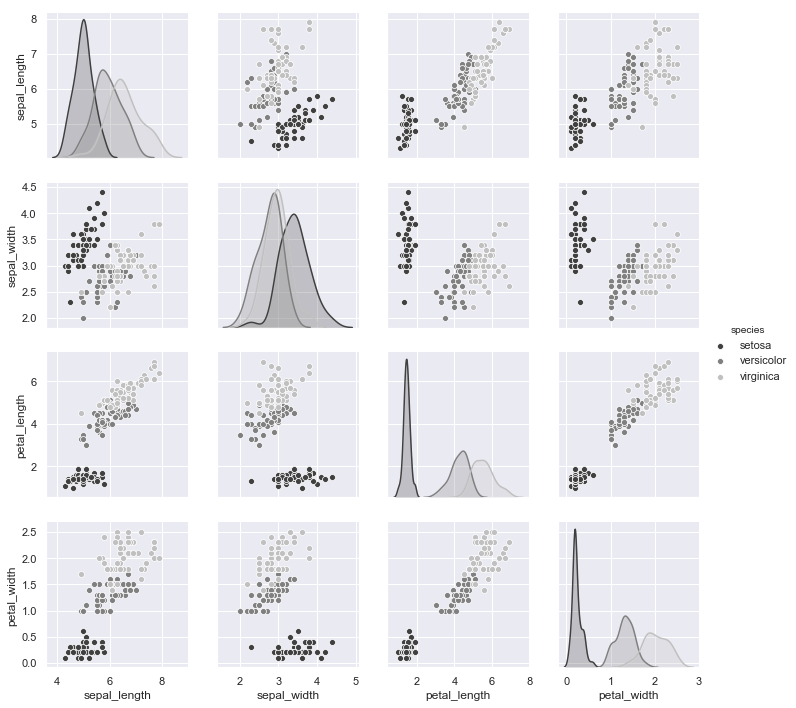

In [111]:
sns.pairplot(iris, hue="species", palette='gray')
# hue="カテゴリ変数の列名"で、カテゴリ別に色分けしたグラフを描いてくれる
# 対角線上はヒストグラム

### 4章 母集団からの標本抽出シミュレーション

##### ライブラリのインポート

In [112]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
#
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
#
%precision 3
#
%matplotlib inline

##### 標本が得られるプロセス
- 標本は確率変数
- 母集団から1つ選んで標本とする
- どの標本が選ばれるかは確率的に決まる
- だから手持ちの標本は確率変数とみなせる

##### 5尾の魚しかいない湖からの標本抽出

In [113]:
fish_5 = np.array([2, 3, 4, 5, 6])
fish_5

array([2, 3, 4, 5, 6])

In [114]:
np.random.choice(fish_5, size = 1, replace = False)

array([5])

In [115]:
np.random.choice(fish_5, size = 3, replace = False)

array([4, 6, 5])

In [116]:
np.random.choice(fish_5, size = 3, replace = False)

array([6, 5, 3])

シードを使うとランダムのパターンを指定できる

In [117]:
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [118]:
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [119]:
np.random.seed(1)
sp.mean(np.random.choice(fish_5, size = 3, replace = False))

4.333333333333333

##### 乱数
- ランダムに得られる値のこと
- 標本抽出シミュレーションは、一種の乱数を生成する作業

##### 復元抽出・非復元抽出
- 復元抽出　標本を母集団に返す
- 非復元抽出　返さない

##### もっとたくさんの魚がいる湖からの標本抽出
- 今までは母集団を全て観測することができた、という通常はありえない想定

In [121]:
fish_100000 = pd.read_csv(
    "3-4-1-fish_length_100000.csv")["length"]
fish_100000.head()

0    5.297442
1    3.505566
2    3.572546
3    3.135979
4    4.689275
Name: length, dtype: float64

In [122]:
len(fish_100000)

100000

In [123]:
sampling_result = np.random.choice(
    fish_100000, size = 10, replace = False)
sampling_result

array([4.091, 5.465, 3.426, 4.287, 4.244, 4.282, 4.29 , 5.087, 2.769,
       5.296])

In [124]:
sp.mean(sampling_result)

4.3235970793805025

##### 母集団分布

In [125]:
sp.mean(fish_100000)

4.000000000000001

In [126]:
sp.std(fish_100000, ddof = 0)

0.8

In [127]:
sp.var(fish_100000, ddof = 0)

0.64

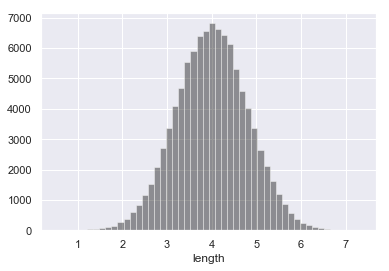

In [129]:
sns.distplot(fish_100000, kde = False, color = 'black')
# 平均4、分散0.64の正規分布で表現できそう

##### 母集団分布と正規分布の確率密度関数の比較
- 母集団のヒストグラムと正規分布の確率密度を比較して見る

In [131]:
x = np.arange(start = 1, stop = 7.1, step = 0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [132]:
stats.norm.pdf(x = x, loc = 4, scale = 0.8)

array([4.407e-04, 6.988e-04, 1.091e-03, 1.676e-03, 2.536e-03, 3.778e-03,
       5.540e-03, 7.998e-03, 1.137e-02, 1.591e-02, 2.191e-02, 2.971e-02,
       3.967e-02, 5.215e-02, 6.749e-02, 8.598e-02, 1.078e-01, 1.332e-01,
       1.619e-01, 1.938e-01, 2.283e-01, 2.648e-01, 3.025e-01, 3.401e-01,
       3.764e-01, 4.102e-01, 4.401e-01, 4.648e-01, 4.833e-01, 4.948e-01,
       4.987e-01, 4.948e-01, 4.833e-01, 4.648e-01, 4.401e-01, 4.102e-01,
       3.764e-01, 3.401e-01, 3.025e-01, 2.648e-01, 2.283e-01, 1.938e-01,
       1.619e-01, 1.332e-01, 1.078e-01, 8.598e-02, 6.749e-02, 5.215e-02,
       3.967e-02, 2.971e-02, 2.191e-02, 1.591e-02, 1.137e-02, 7.998e-03,
       5.540e-03, 3.778e-03, 2.536e-03, 1.676e-03, 1.091e-03, 6.988e-04,
       4.407e-04])

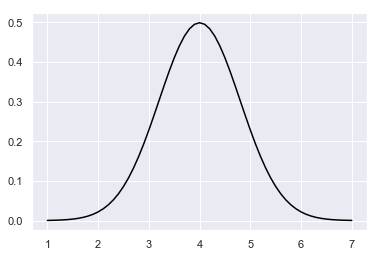

In [133]:
plt.plot(x,
        stats.norm.pdf(x = x, loc = 4, scale = 0.8),
        color = 'black')

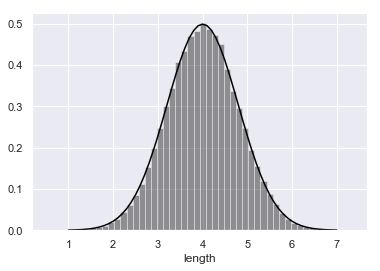

In [134]:
sns.distplot(fish_100000, kde = False,
            norm_hist = True, color = 'black')
plt.plot(x,
        stats.norm.pdf(x = x, loc = 4, scale = 0.8),
        color = 'black')

##### 標本が得られるプロセスの抽象化
- 母集団分布は正規分布だとみなすことができそう
- 母集団からの標本抽出は正規分布に従う乱数を発生させることとほぼ同等
- 今までは母集団そのものから標本をとっていた
- これからは正規分布を用いる

In [135]:
sampling_norm = stats.norm.rvs(
loc = 4, scale = 0.8, size = 10)
sampling_norm

array([4.037, 3.498, 4.322, 5.295, 5.499, 2.905, 4.437, 4.665, 3.786,
       4.569])

In [136]:
sp.mean(sampling_norm)

4.301401664573935

##### 有限母集団修正
- 4.9節の議論には飛躍が2つ
- 母集団のヒストグラムと、正規分布の確率密度が等しい。とみなしてしまっている。
  - ヒストグラムの階級ごとのギザギザと確率密度の形は明らかに違う。
  - 母集団分布に正規分布を仮定するというのは、母集団が無限母集団であるときにつじつまがあうもの
- 